# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from seglearn.pipe import Pype
from seglearn.transform import FeatureRep, Segment
from seglearn.feature_functions import mean, var, std, skew

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
#%matplotlib notebook

# Paths

In [2]:
data_path = "./Data/HomoreDataFromVariousActivities/"
graphs_path = "./Graphs/"

# Importing the Data

In [3]:
activities_data = data_path + "activities.csv"
accelerometer_data = data_path + "accelerometer_various_activities_10hz.csv"
gyroscope_data = data_path + "gyroscope_various_activities_10hz.csv"
heartrate_data = data_path + "heartrate_various_activities.csv"

In [4]:
df_activities = pd.read_csv(activities_data)
df_accelerometer = pd.read_csv(accelerometer_data)
df_gyroscope = pd.read_csv(gyroscope_data)
df_heartrate = pd.read_csv(heartrate_data)

In [5]:
#df_activities.head()
df_accelerometer.head()
#df_gyroscope.head()
#df_heartrate.head()

,TIMESTAMP,X_AXIS,Y_AXIS,Z_AXIS,ACTIVITY_ID
0,2020-08-25 19:23:14.590000+03:00,-1.230657,5.430215,7.670058,107
1,2020-08-25 19:23:14.690000+03:00,-1.743032,4.716721,8.117788,107
2,2020-08-25 19:23:14.790000+03:00,-2.229070,4.455745,8.960572,107
3,2020-08-25 19:23:14.890000+03:00,-2.496031,3.766193,9.097046,107
4,2020-08-25 19:23:14.990000+03:00,-2.711515,2.225478,9.026415,107


In [6]:
df_activities

,ACTIVITY_ID,NAME
0,101,jogging
1,102,walking
2,103,standing
3,104,sitting
4,105,stairs
5,106,brushing teeth
6,107,eating
7,108,eating with fingers
8,109,drinking from cup
9,110,writing


In [7]:
#df_activities.info()
#df_accelerometer.info()
#df_gyroscope.info()
df_heartrate.info()
print("There is no missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15240 entries, 0 to 15239
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIMESTAMP    15240 non-null  object
 1   HEARTRATE    15240 non-null  int64 
 2   ACTIVITY_ID  15240 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 357.3+ KB
There is no missing values


In [8]:
datetime_format = "%Y-%m-%d %H:%M:%S.%f"
df_accelerometer["TIMESTAMP"] = pd.to_datetime(df_accelerometer["TIMESTAMP"], format=datetime_format)
df_gyroscope["TIMESTAMP"] = pd.to_datetime(df_gyroscope["TIMESTAMP"], format=datetime_format)
df_heartrate["TIMESTAMP"] = pd.to_datetime(df_heartrate["TIMESTAMP"], format=datetime_format)
print(df_accelerometer["TIMESTAMP"])
print("")
print(df_gyroscope["TIMESTAMP"])
print("")
print(df_heartrate["TIMESTAMP"])
print("")
print("Accelerometer and gyroscope are synchronized.")

0        2020-08-25 19:23:14.590000+03:00
1        2020-08-25 19:23:14.690000+03:00
2        2020-08-25 19:23:14.790000+03:00
3        2020-08-25 19:23:14.890000+03:00
4        2020-08-25 19:23:14.990000+03:00
                       ...               
154195   2020-09-03 14:51:07.071000+03:00
154196   2020-09-03 14:51:07.171000+03:00
154197   2020-09-03 14:51:07.271000+03:00
154198   2020-09-03 14:51:07.371000+03:00
154199   2020-09-03 14:51:07.471000+03:00
Name: TIMESTAMP, Length: 154200, dtype: datetime64[ns, pytz.FixedOffset(180)]

0        2020-08-25 19:23:14.590000+03:00
1        2020-08-25 19:23:14.690000+03:00
2        2020-08-25 19:23:14.790000+03:00
3        2020-08-25 19:23:14.890000+03:00
4        2020-08-25 19:23:14.990000+03:00
                       ...               
154195   2020-09-03 14:51:07.071000+03:00
154196   2020-09-03 14:51:07.171000+03:00
154197   2020-09-03 14:51:07.271000+03:00
154198   2020-09-03 14:51:07.371000+03:00
154199   2020-09-03 14:51:07.471000+03:

# Ploting the Data

## Checking if data are synchronized.

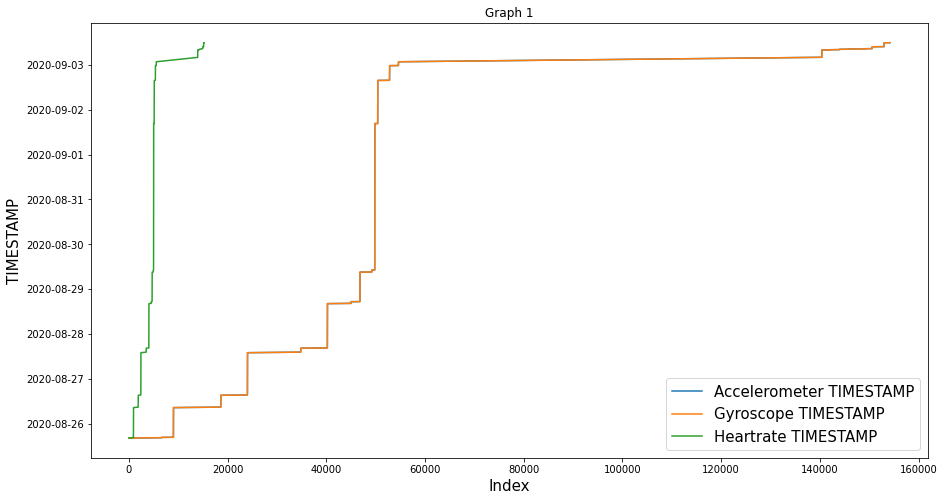

In [9]:
#df[["x_acceleration", "y_acceleration", "z_acceleration"]].plot(figsize=(20, 12))
title = "Graph 1"
df_accelerometer["TIMESTAMP"].plot(figsize = (15, 8))
df_gyroscope["TIMESTAMP"].plot()
df_heartrate["TIMESTAMP"].plot()
plt.title(title)
plt.legend(["Accelerometer TIMESTAMP", "Gyroscope TIMESTAMP", "Heartrate TIMESTAMP"], fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("TIMESTAMP", fontsize=15)
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

## Ploting frequency of every activity

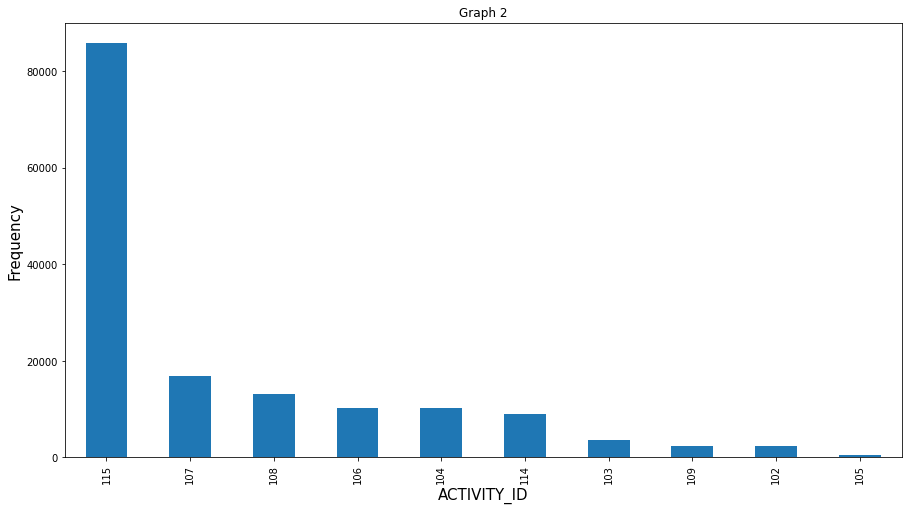

In [10]:
title = "Graph 2"
df_activities_counter = df_accelerometer["ACTIVITY_ID"].value_counts()
df_activities_counter.plot.bar(figsize = (15, 8))
plt.title(title)
plt.xlabel("ACTIVITY_ID", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

## Ploting data of the sensors

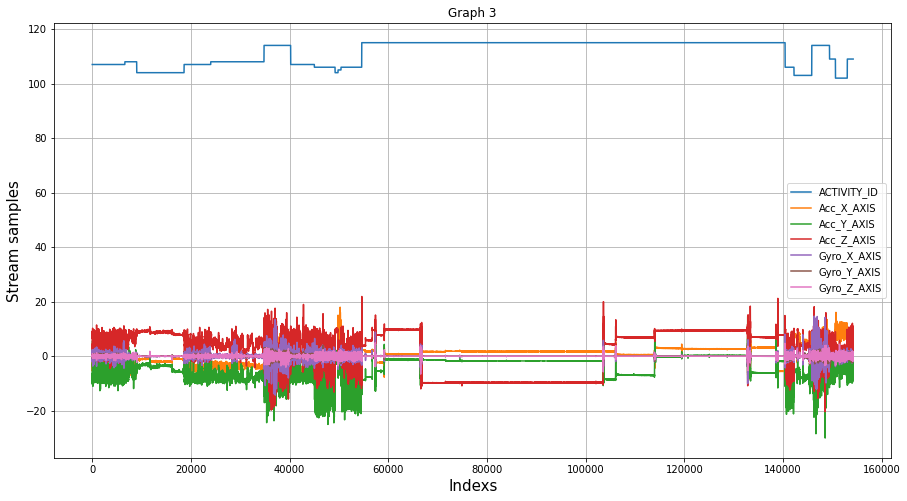

In [11]:
title = "Graph 3"
ax = df_accelerometer[["ACTIVITY_ID", "X_AXIS", "Y_AXIS", "Z_AXIS"]].plot(figsize = (15, 8))
ax.plot(df_gyroscope[["X_AXIS", "Y_AXIS", "Z_AXIS"]])
plt.title(title)
plt.xlabel("Indexs", fontsize=15)
plt.ylabel("Stream samples", fontsize=15)
plt.grid()
plt.legend(["ACTIVITY_ID", "Acc_X_AXIS", "Acc_Y_AXIS", "Acc_Z_AXIS", "Gyro_X_AXIS", "Gyro_Y_AXIS", "Gyro_Z_AXIS"])
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

# Drop the lying on part of data

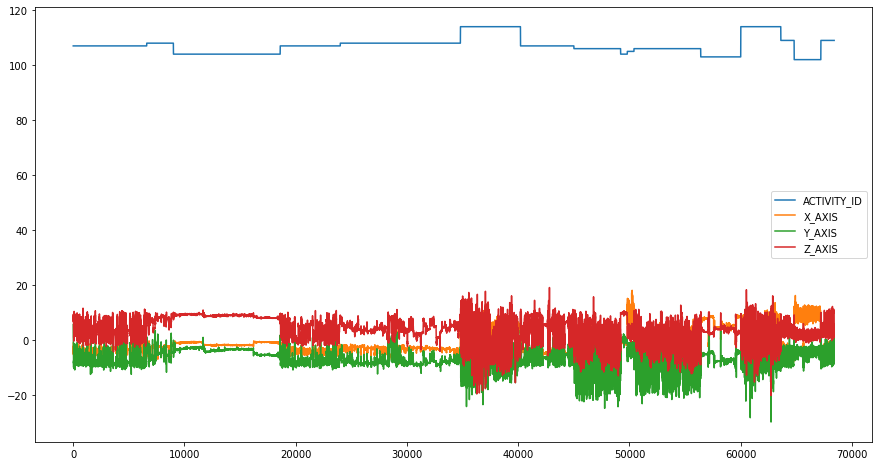

In [12]:
lying_on_id = df_activities.loc[df_activities["NAME"] == "lying on"]["ACTIVITY_ID"].iloc[0]

# Droping the rows
df_accelerometer.drop(df_accelerometer[df_accelerometer["ACTIVITY_ID"] == lying_on_id].index, inplace=True)
df_gyroscope.drop(df_gyroscope[df_gyroscope["ACTIVITY_ID"] == lying_on_id].index, inplace=True)
df_heartrate.drop(df_heartrate[df_heartrate["ACTIVITY_ID"] == lying_on_id].index, inplace=True)

# Reseting the index
df_accelerometer.reset_index(inplace=True)
df_gyroscope.reset_index(inplace=True)
df_heartrate.reset_index(inplace=True)

#print(df_accelerometer.shape, df_gyroscope.shape, df_heartrate.shape)
df_accelerometer[["ACTIVITY_ID", "X_AXIS", "Y_AXIS", "Z_AXIS"]].plot(figsize = (15, 8))
plt.show()


## Find when activity changes (accelerometer only)

In [13]:
# Sampling frequency of accelerometer (10 Hz)
sampling_frequency = df_accelerometer.loc[2, "TIMESTAMP"] - df_accelerometer.loc[1, "TIMESTAMP"]
# Finding the indexs where the samples differ more than sampling frequency
activity_cutoff = df_accelerometer.loc[df_accelerometer['TIMESTAMP'] - df_accelerometer['TIMESTAMP'].shift() > sampling_frequency]

In [14]:
activity_cutoff.index

Int64Index([ 6600,  9000, 18600, 24000, 34800, 40200, 45000, 46800, 49200,
            49800, 50400, 52800, 54600, 56400, 58200, 60000, 63600, 64800,
            67200],
           dtype='int64')

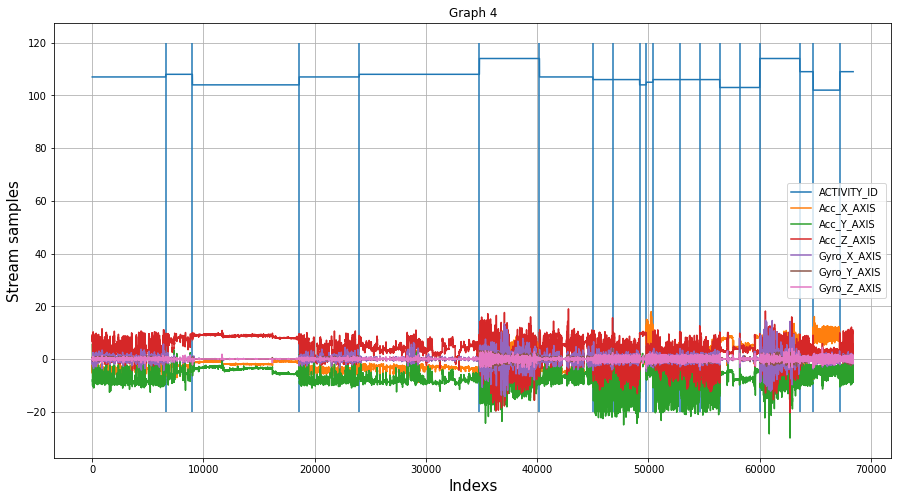

In [15]:
title = "Graph 4"
ax = df_accelerometer[["ACTIVITY_ID", "X_AXIS", "Y_AXIS", "Z_AXIS"]].plot(figsize = (15, 8))
ax.plot(df_gyroscope[["X_AXIS", "Y_AXIS", "Z_AXIS"]])
ax.vlines(activity_cutoff.index, ymin=-20, ymax=120)
plt.title(title)
plt.xlabel("Indexs", fontsize=15)
plt.ylabel("Stream samples", fontsize=15)
plt.grid()
plt.legend(["ACTIVITY_ID", "Acc_X_AXIS", "Acc_Y_AXIS", "Acc_Z_AXIS", "Gyro_X_AXIS", "Gyro_Y_AXIS", "Gyro_Z_AXIS"])
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

# One dataframe for accelerometer and gyroscope

In [16]:
df_accel_gyro = pd.DataFrame(df_accelerometer[["TIMESTAMP", "X_AXIS", "Y_AXIS", "Z_AXIS"]])
df_accel_gyro.rename(columns={"X_AXIS": "ACCEL_X", "Y_AXIS": "ACCEL_Y", "Z_AXIS" : "ACCEL_Z"}, inplace=True)
df_accel_gyro["GYRO_X"] = df_gyroscope["X_AXIS"]
df_accel_gyro["GYRO_Y"] = df_gyroscope["Y_AXIS"]
df_accel_gyro["GYRO_Z"] = df_gyroscope["Z_AXIS"]
df_accel_gyro["ACTIVITY_ID"] = df_gyroscope["ACTIVITY_ID"]

# Keeping categories with some datapoints
selected_datapoits = df_gyroscope["ACTIVITY_ID"].isin([104, 106])
df_accel_gyro = df_accel_gyro.loc[selected_datapoits]
df_accel_gyro.reset_index(inplace=True)
#df_accel_gyro[["ACCEL_X", "ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "ACTIVITY_ID"]].plot()

## Data is list with arrays. Every array is an activity. Labels is list with labels for every activity.

In [17]:
sampling_frequency = df_accel_gyro.loc[2, "TIMESTAMP"] - df_accel_gyro.loc[1, "TIMESTAMP"]
# Finding the indexs where the samples differ more than sampling frequency
activities = df_accel_gyro.loc[df_accel_gyro['TIMESTAMP'] - df_accel_gyro['TIMESTAMP'].shift() > sampling_frequency]

# Constracting the data exactly how the seglearn needs it
# Data must be list(np.arrays)
# list() -> single multivariate time series
# X[0].shape -> (n_samples, n_variables)
# n_samples is how many data points we have in time we have
# n_variables is how many sensors we have

# I do not include the moment where activity changes
X = list()
y = list()
groups = list()
low_index = 0

# For one patient I will split every activity in 0.8 train set and 0.2 test set
# To make use of groups the test set I will make it group 0 and the test set group 1
# When we have more data each patient will be one group
trainset_percentage = 0.5
for i, high_index in enumerate(activities.index):
    # This is for when we have more patients
    #X.append(df_accel_gyro[["ACCEL_X","ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z"]].iloc[low_index : high_index].to_numpy())
    #y.append(df_accel_gyro["ACTIVITY_ID"].iloc[low_index])
    #low_index = high_index
    
    mid_index = int((high_index + low_index) * trainset_percentage)
    
    # First half of activity as the first group
    X.append(df_accel_gyro[["ACCEL_X","ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z"]].iloc[low_index : mid_index].to_numpy())
    #y.append(df_accel_gyro["ACTIVITY_ID"].iloc[low_index : mid_index].to_numpy())
    y.append(df_accel_gyro["ACTIVITY_ID"].iloc[low_index])
    
    groups.append(0)
    
    # Second half of activity as the second group
    X.append(df_accel_gyro[["ACCEL_X","ACCEL_Y", "ACCEL_Z", "GYRO_X", "GYRO_Y", "GYRO_Z"]].iloc[mid_index : high_index].to_numpy())
    #y.append(df_accel_gyro["ACTIVITY_ID"].iloc[mid_index : high_index].to_numpy())
    y.append(df_accel_gyro["ACTIVITY_ID"].iloc[low_index])
    groups.append(1)
    
    #print(low_index, mid_index, high_index)
    low_index = high_index


In [18]:
df_accel_gyro["ACTIVITY_ID"].value_counts()

106    10200
104    10200
Name: ACTIVITY_ID, dtype: int64

# Defining the features and the pipeline

In [19]:
# Defining some features
#def mean(X):
#    return np.mean(X, axis = 1)

#def var(X):
#    return np.var(X, axis = 1)

features = dict()
features = {"mean":mean, "var":var, "std":std, "skew":skew}

pipeline = Pype([
    ("segment", Segment()),
    ("features", FeatureRep(features = features)),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("rf", RandomForestClassifier())
], memory=None)

/home/geo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass memory=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/geo/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


## Create the fragments without including the moment where the activity changes

In [20]:
splitter = GroupKFold(n_splits=2)
cv = splitter.split(X, y, groups)

parameters_grid = {"segment__width": list(range(100, 210, 10)),
                   "segment__overlap": np.arange(0.0, 0.5, 0.1).tolist(),
                   "pca__n_components" : [20, 21, 22, 23, 24],
                   "rf__n_estimators": range(5, 25, 5)
                  }

# scoring does not work for some reason
# it maybe always say the big category for each fragment
# scoring="accuracy", maybe because random forest has out of bag error 
grid_search = GridSearchCV(pipeline, parameters_grid, cv=cv, n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

/home/geo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass memory=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/geo/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


1.0
Pype(steps=[('segment', Segment(overlap=0.0, width=110)),
            ('features',
             FeatureRep(features={'mean': <function mean at 0x7f3aee86ab80>,
                                  'skew': <function skew at 0x7f3aee801310>,
                                  'std': <function std at 0x7f3aee86af70>,
                                  'var': <function var at 0x7f3aee801040>})),
            ('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
            ('rf', RandomForestClassifier(n_estimators=5))])


/home/geo/.local/lib/python3.8/site-packages/seglearn/transform.py:237: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Xt = np.array([sliding_tensor(Xt[i], self.width, self._step, self.order)


In [26]:
best_estimator = grid_search.best_estimator_

cv = splitter.split(X, y, groups)

results = cross_validate(best_estimator, X, y, cv=cv, n_jobs=-1)
results

/home/geo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass memory=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/geo/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


{'fit_time': array([0.01729178, 0.01439476]),
 'score_time': array([0.01283073, 0.01096416]),
 'test_score': array([0.72839506, 0.9382716 ])}

In [34]:
transform_pipe = Pype([
    ("segment", best_estimator.named_steps["segment"]),
    ("features", best_estimator.named_steps["features"]),
    ("scaler", best_estimator.named_steps["scaler"]),
    ("pca", best_estimator.named_steps["pca"]),
], memory=None)

cv = splitter.split(X, y, groups)
for fold, split in enumerate(cv):
    training_set, test_set = split
    
    # Spliting the to training and testing set
    x_train, x_test = np.asarray(X)[training_set], np.asarray(X)[test_set]
    y_train, y_test = np.asarray(y)[training_set], np.asarray(y)[test_set]
    
    # Transforming the test data to fit the model predictions
    _, y_test_trans = transform_pipe.fit_transform(x_test, y_test)
    
    # Fiting the model
    best_estimator.fit(x_train, y_train)
    
    # Predicting with trained model
    y_pred = best_estimator.predict(x_test)
    
    # Printing accuracy score and confusion matrix
    print(accuracy_score(y_pred, y_test_trans))
    print(confusion_matrix(y_pred, y_test_trans))

1.0
[[45  0]
 [ 0 36]]
0.9259259259259259
[[41  2]
 [ 4 34]]


/home/geo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass memory=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/geo/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/geo/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/geo/.local/lib/python3.8/site-packages/seg